<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793546-Ariel-Corral-Leon/blob/main/ESTE_ES_EL_ACTUALIZADO_56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

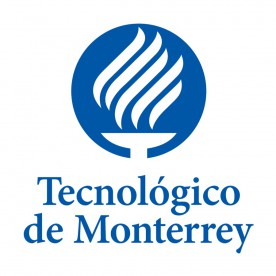



#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**
<Center>

| Nombre | matricula de los integrantes del equipo
|---|---|
| Helmy Andrea Moreno Navarro | A01793918 |
| José Santiago Rueda Antonio | A01794118 |
| Eddie Guadalupe Elorza Ruiz | A01793547 |
| Saúl Yovani Salgueiro Lindoro |A01633510|
| José Ariel Corral León | A01793546 |

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [4]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
# Carga de datos
from sklearn.model_selection import train_test_split, cross_validate,  RepeatedKFold,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,MinMaxScaler,FunctionTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


In [5]:
df = pd.read_csv('https://drive.google.com/uc?id=1D9iRt78ryiQ7B758QojB4W-H_8GQK8Hl',sep=';') # Mandando a llamar la base de datos que utilizaremos definiendo el ";" como separador de datos
df #mostraremos el datase

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


#**Ejercicio-1.** 
En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado.

In [6]:
df.rename(columns={"Lifetime People who have liked your Page and engaged with your post": "LPE"},inplace=True) # renombramos el encabezado de una columna por su longitud directamente en el df
df #mostramos el dataset para corroborar que ha sido ejecutada la instrucción correctamente

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [7]:
df.info() #con estra instrucción mostramos el detalle de las columnas para saber que tipo (Dtype) de información es la que tenemos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Page total likes                                              500 non-null    int64  
 1   Type                                                          500 non-null    object 
 2   Category                                                      500 non-null    int64  
 3   Post Month                                                    500 non-null    int64  
 4   Post Weekday                                                  500 non-null    int64  
 5   Post Hour                                                     500 non-null    int64  
 6   Paid                                                          499 non-null    float64
 7   Lifetime Post Total Reach                                     500 non-n

In [8]:
Y= df.LPE #definiremos el "eje y con estos datos"
X= df.iloc[0:,0:7] #definiremos el indexado del "eje" x con este segmento de datos de nuestro dataset
random_state_v = 3 #aqui nos ahorarremos el esfuerzo de estar definiendo el random_state de futuros pasos para definirlo desde aqui

#**Ejercicio-2.**
Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación.

In [9]:
X.shape # mostramos las caracteristicas dimensionales de "x" anteriormente definido por el dataset

(500, 7)

In [10]:
X_train_V, X_val, y_train_V, y_val = train_test_split(X, Y, test_size= 0.20, random_state=random_state_v) #aqui estamos definiendo nuestros segmentos de datos para el modelo de entrenamiento

print(X_train_V.shape, X_val.shape, y_train_V.shape, y_val.shape) # aqui estamos mostrando las características dimensionales de dichas particiones

(400, 7) (100, 7) (400,) (100,)


In [11]:
X_train_V.shape # aqui mostramos las características exclusivamente del conjunto de entrenamiento

(400, 7)

#**Ejercicio-3.**
Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE.

In [12]:
def mi_RMSE(valores_reales, valores_prediccion):  # definiendo  la función que utilizaremos para RMSE con sus variables
  return np.sqrt(np.mean(np.square(valores_reales - valores_prediccion))) #definiendo que será el resultado de nuestra función

$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$

In [13]:
def  mi_MAE(valores_reales, valores_prediccion): # definiendo  la función que utilizaremos para MAE con sus variables
  return np.mean(np.abs(valores_reales - valores_prediccion)) #definiendo que será el resultado de nuestra función

$\sum_{i=1}^{D}|x_i-y_i|$

In [14]:
def  mi_MAPE(valores_reales, valores_prediccion): # definiendo  la función que utilizaremos para MAPE con sus variables
  return np.mean(np.abs((valores_reales - valores_prediccion)/valores_reales)) * 100 #definiendo que será el resultado de nuestra función

MAPE = $\frac{100\%}{n}\sum_{t=1}^{n}\left |\frac{e_t}{y_t}\right|$

#**Ejercicio-4.**
En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información.

In [15]:
X_train_V # mostrando el modelo de entrenamiento

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
280,126345,Photo,2,6,1,12,0.0
190,133679,Photo,3,9,2,3,1.0
103,137020,Photo,1,10,3,4,0.0
201,132817,Photo,1,8,3,9,0.0
402,107907,Photo,1,4,3,4,1.0
...,...,...,...,...,...,...,...
440,98195,Photo,1,3,5,10,0.0
131,136393,Photo,1,10,6,9,0.0
249,129600,Photo,2,7,7,11,1.0
152,135713,Photo,2,10,5,4,1.0


In [16]:
X_train_V.isna().sum() # realizar una revision y sumar la cantidad, esto para evitar tener inconvenientes al procesar los datos

Page total likes    0
Type                0
Category            0
Post Month          0
Post Weekday        0
Post Hour           0
Paid                1
dtype: int64

In [17]:
X_train_V.shape # aquí estamos re-confirmando el modelo dimensional de entrenamiento

(400, 7)

In [18]:
X_train_V.columns.to_list() # visualizando y enlistando las columnas

['Page total likes',
 'Type',
 'Category',
 'Post Month',
 'Post Weekday',
 'Post Hour',
 'Paid']

Para realizar la imputación de los datos correctamente, tenemos que definir cada campo con su tipo de variable que le corresponde, que en este caso son:
 
* **Categórica:** Son aquellas variables que cuentan con un número finito de categorías, tienen la función de relacionar a los datos entre sí.
* **Ordinal:** Son aquellos valores cuantitativos discretos por lo que solamente elige valores específicos, en vez de cualquier valor en un intervalo.
* **Cuantitativa:** Puede ser un valor continuo, por lo que en teoría podemos tomar cualquier valor dentro de un intervalo grande de valores posibles.
* **Binaria:** Los datos binarios solamente contienen 2 posibles resultados para sus datos.

A partir de las definiciones podemos empezar a dividir las variables en su grupo correspondiente para llevar a cabo un procesamiento eficiente de los datos, tenemos que asegurarnos que no tienen campos “vacíos” o “erróneos”, este proceso se llevará a cabo con las imputaciones con la función *SimpleImputer*, de tal manera que los datos puedan ser “limpiados” y evitar errores posteriores.


In [19]:
categorical_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='constant'))])     # realizando el pipeline para las categóricas imputándolas con estategia constante por el tipo de datos
categoricas = ['Category']                                                                        # https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

 
ordinal_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='constant')),  # realizando el pipeline igualmente imputando  a las ordinales con estategia constante por el tipo de datos
                                            ('ordinal', OrdinalEncoder())])               # el feature de ordinal encoder de sklearn https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
ordinal = ['Type']


numerica_transformer = Pipeline(steps = [('imputer', SimpleImputer()),                    # realizando imputación simple con el feature de min max scaller a las cuantitativas
                                        ('scaler',MinMaxScaler())])                       # esto se realizará así ya que requieren un tratamiento distindo debido a sus tipos de datos
cuantitativa = ['Page total likes', 'Post Month','Post Weekday','Post Hour']              # fuente de min max scaler : 
                                                                                          # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=min+max+scaler#sklearn.preprocessing.MinMaxScaler

binaria_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='mean'))])     # por último realizaremos el pipeline para las binarias:
binaria = ['Paid']                                                                        # asignando una imputación simple con  estrategia media


Text(0.5, 1.0, ' Transf. Min Max')

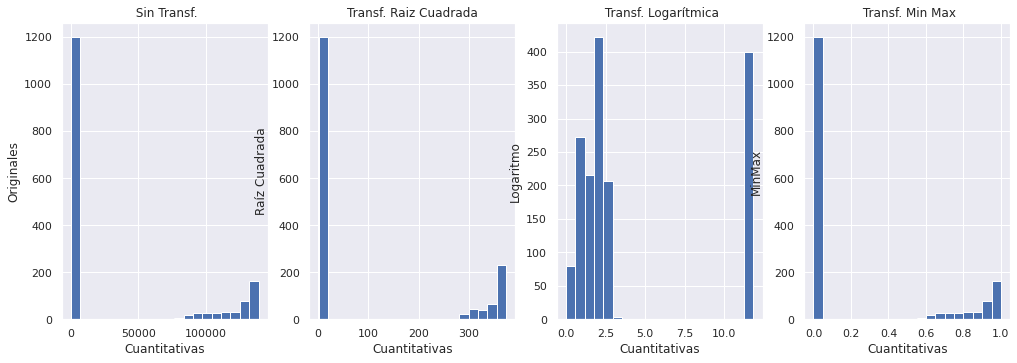

In [20]:
#   Ahora definiremos el preprocesador con las columnas que definimos anteriormente
sns.set(rc={'figure.figsize':(17,12)})  # definimos el tamaño de la figura
fig, axes = plt.subplots(1, 1)    
# Datos originales ---------------------------------------------------------
plt.subplot(2,4,1)  # definimos la posición de la figura
Transf0 = X_train_V[cuantitativa].to_numpy().reshape(-1, 1) #definimos la variable que utilizaremos para la transformación
plt.hist(Transf0,bins=20) # definimos la variable que utilizaremos para la transformació
plt.xlabel('Cuantitativas')  # definimos el nombre del eje x
plt.ylabel('Originales') # definimos el nombre del eje y
plt.title(' Sin Transf.') # definimos el título de la figura             



# Datos transformados con raíz cuadrada ------------------------------------
plt.subplot(2,4,2)    
Transf1 = np.sqrt(X_train_V[cuantitativa].to_numpy().reshape(-1, 1))
plt.hist(Transf1,bins=20)       
plt.xlabel('Cuantitativas')
plt.ylabel('Raíz Cuadrada')
plt.title('Transf. Raiz Cuadrada')              

  
# Datos transformados con logaritmo natural --------------------------------
plt.subplot(2,4,3)     
Transf2 = np.log(X_train_V[cuantitativa].to_numpy().reshape(-1, 1))
plt.hist(Transf2,bins=20)                    
plt.xlabel('Cuantitativas')
plt.ylabel('Logaritmo')
plt.title(' Transf. Logarítmica')              



# Datos transformados con MinMax ---------------------------------
plt.subplot(2,4,4)
minmax = MinMaxScaler()
minmax.fit(X_train_V[cuantitativa].to_numpy().reshape(-1, 1))
Transf3 = minmax.transform(X_train_V[cuantitativa].to_numpy().reshape(-1, 1))
plt.hist(Transf3,bins=20) 
plt.xlabel('Cuantitativas')
plt.ylabel('MinMax')
plt.title(' Transf. Min Max')              

In [21]:
def y_Transform(Y):                 # aquí estamos definiendo la transformada de "Y"
  #print("Transf(y)\n")             # en caso de que deseemos ver cuándo se manda llamar la función que se está ejecutando 
  Y_ = Y.copy() 
  Y_ = np.log(Y_)                   # realizando la función inversa exponencial de "Y" con el logarítmo del arreglo copiado de "Y"
  return Y_

# Inversa de la variable de salida que se usará para las predicciones:
def y_inverseTransform(Y):          # aquí estamos realizando la inversa transformada de "Y"
  #print("invTransf(y)\n")          # en caso de que deseemos ver cuándo se manda llamar la función que se está ejecutando 
  Y_ = Y.copy() 
  Y_ = np.exp(Y)                    # realizando la fución exponencial de "Y"  para calcular la exponencia del arreglo copiado de "Y"
  return Y_

In [22]:
ColumnPreprocessor = ColumnTransformer(transformers = [('numeric', numerica_transformer, cuantitativa),        # con este column transformer buscaremos que al realizar el procesamiendo 
                                                       ('categorical', categorical_transformer, categoricas),  # de nuestros datos no perdamos sus acomodos ni movimiento de datos
                                                       ('ordinal', ordinal_transformer, ordinal),              # y definimos el procesamiento de todas nuestras columnas
                                                        ('binary', binaria_transformer, binaria),              # pasando por las numericas, categóricas, ordinarias y binarias
                                                       ])                      # este proceso se realiza cuando nuestros datos son tabulares y hay riesgo de que puedan moverse y causar
                                                                               # posibles errores en nuestros análisis.


#**Ejercicio-5.**
Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la actividad. Consulta su documentación correspondiente: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [23]:
X_train_Dummy, X_val_Dummy, y_train_Dummy, y_val_Dummy = train_test_split(X_train_V, y_train_V, train_size= 0.75, random_state=random_state_v) # aqui estamos restructurando nuevamente nuestros datos 
                                                                                                 # de entrenamiento con un 75% como se requiere para el ejercicio (75% de 400 = 300)

In [24]:
X_train_Dummy.shape # confirmando que nuestro bloque para entrenamiento coincida a lo que habíamos establecido

(300, 7)

In [25]:
X_val_Dummy.shape # revisando el dimensionamiento de nuestros datos X_val

(100, 7)

In [26]:
mDR = DummyRegressor()      # realizando la asignación de la varariable mDR para el procesamiento de Dummy Regressor de SkLearn :https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html
pipeline = Pipeline(steps=[('ct',ColumnPreprocessor),  ('m',mDR)]) # conformando el pipeline para su ejecución con los parametros

# Construimos el modelo con las transformaciones de la
# variable de entrada y la variable de salida:
modelo = TransformedTargetRegressor(regressor=pipeline, 
                                    func= y_Transform,     # transformación para ajuste del sesgo.
                                    inverse_func=y_inverseTransform    # Para regresar los valores "y" en la escala original.
                                    )

In [27]:
# Entrenamos el modelo: Este proceso puede tardar un poco en ejecutarse 
# debido a que se están realizando muchas transformaciones.
modelo.fit(X_train_Dummy, y_train_Dummy)   # ajustando el modelo con los datos de entrenamiento

# Generemos nuestras propia lista de resultados para nuestras propias curvas de aprendizaje:

# RMSE-errores del Train:
train_yhat = modelo.predict(X_train_Dummy) # predicciones de "y" para el conjunto de entrenamiento
train_rmse = mi_RMSE(y_train_Dummy, train_yhat)        # calculamos el RMSE para el conjunto de entrenamiento


# # RMSE-errores del Validation:
val_yhat = modelo.predict(X_val_Dummy) # predicciones de "y" para el conjunto de validación
val_rmse = mi_RMSE(y_val_Dummy, val_yhat)   # calculamos el RMSE para el conjunto de validación 

#   # ####################

# # MAE-errores del Train:
train_yhat = modelo.predict(X_train_Dummy)  # predicciones de "y" para el conjunto de entrenamiento
train_mae = mi_MAE(y_train_Dummy, train_yhat)   # calculamos el MAE para el conjunto de entrenamiento 


# # MAE-errores del Validation:
val_yhat = modelo.predict(X_val_Dummy) # predicciones de "y" para el conjunto de validación
val_mae = mi_MAE(y_val_Dummy, val_yhat)        # calculamos el MAE para el conjunto de validación    


# # MAPE-errores del Train:
train_yhat = modelo.predict(X_train_Dummy) # predicciones de "y" para el conjunto de entrenamiento
train_mape = mi_MAPE(y_train_Dummy, train_yhat)          # calculamos el MAPE para el conjunto de entrenamiento  


# # MAPE-errores del Validation:
val_yhat = modelo.predict(X_val_Dummy) # predicciones de "y" para el conjunto de validación
val_mape = mi_MAPE(y_val_Dummy, val_yhat)           # calculamos el MAPE para el conjunto de validación 




#**Ejercicio-6.**
Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan.

In [36]:
# Evaluamos el modelo con el conjunto de validación: 
# (Este proceso puede tardar un poco en ejecutarse debido a que se están realizando muchas transformaciones.)
# aquí estamos evaluando el modelo con los datos de validación para ver que tan bien se ajusta a los datos de entrenamiento
# y así poder ver si el modelo está sobreajustado o no.
def get_models():    #aqui definiremos la función de los modelos que utilizaremos de acuerdo a lo que vayamos requiriendo
  modelos = list()
  nombres = list()

  # LR - Regresión Lineal Múltiple:
  modelos.append(LinearRegression())     # con esta definimos 
  nombres.append('LR')

  # RF - Bosque Aleatorio
  modelos.append(RandomForestClassifier(random_state = random_state_v))
  nombres.append('RF')

  # MLP - Perceptrón Multicapa
  modelos.append(MLPRegressor(max_iter=30000,random_state = random_state_v))
  nombres.append('MLP')

  return modelos, nombres

In [37]:
modelos,nombres = get_models() # asignando los modelos y nombres a las variables modelos y nombres

In [38]:
# Evaluamos cada modelo en el conjunto de validación:
resultados = list()
for nombre,modelo in zip(nombres,modelos): # aqui definimos el ciclo for para recorrer los modelos y nombres de los modelos que definimos en la función get_models y los asignamos a las variables nombre y modelo respectivamente 
    KFold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=random_state_v) # definimos el número de repeticiones y particiones que tendrá nuestro modelo
    pipeline = Pipeline(steps=[('ct',ColumnPreprocessor),  ('model',modelo)]) # conformando el pipeline para su ejecución con los parametros
    mismetricas ={ #definimos las métricas que utilizaremos para evaluar nuestro modelo
                  "RMSE": make_scorer(mi_RMSE), #Aqui definimos la función de RMSE que definimos anteriormente
                  "MAE": make_scorer(mi_MAE), #Aqui definimos la función de MAE que definimos anteriormente
                  "MAPE": make_scorer(mi_MAPE) #Aqui definimos la función de MAPE que definimos anteriormente
                  }
    score = cross_validate(estimator=pipeline, X=X_train_V, y=y_train_V, cv=KFold, scoring=mismetricas)  # aqui definimos la función cross_validate para evaluar nuestro modelo con los datos de entrenamiento y validación
    resultados.append({'nombre':nombre,'score':score}) # aqui almacenamos los resultados de cada modelo en la variable resultados

In [39]:
iterations=len(resultados[0]['score']['test_MAE']) # aqui definimos la variable iterations para almacenar el número de iteraciones que se realizaron en cada modelo

In [40]:
it = [x for x in range(0,iterations)] # aqui definimos la variable it para almacenar el número de iteraciones que se realizaron en cada modelo

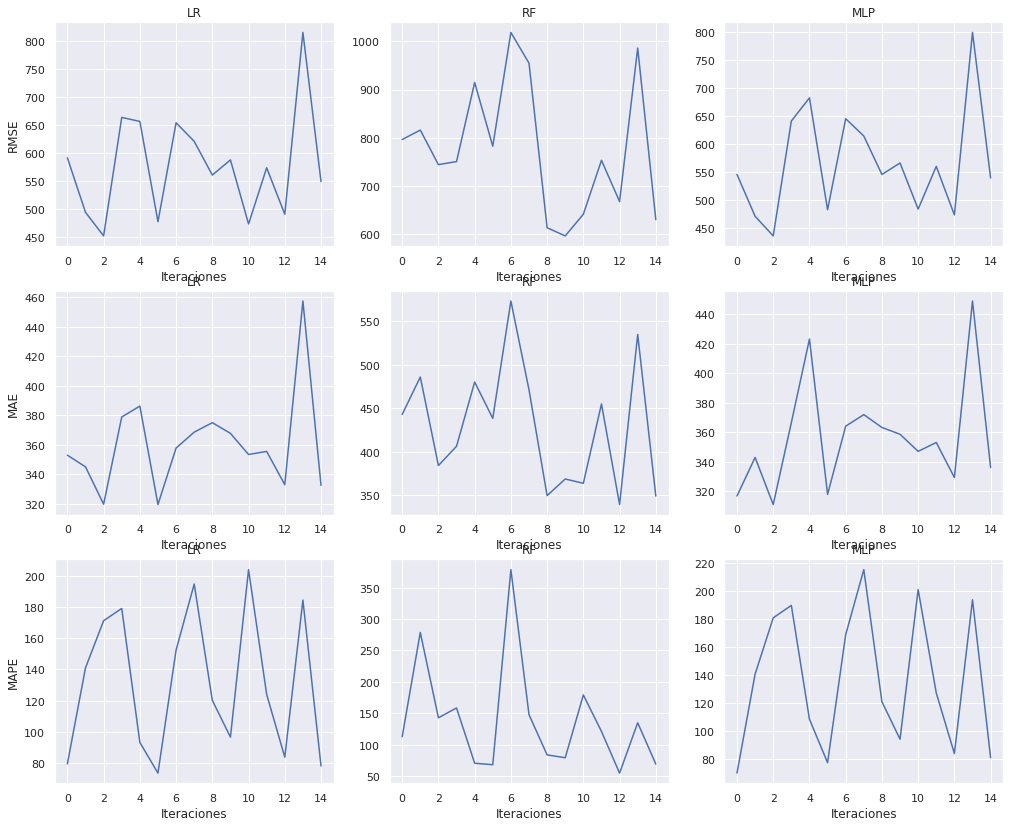

In [41]:
# Graficamos los resultados de cada modelo:
sns.set(rc={'figure.figsize':(17,14)}) # definimos el tamaño de la figura que se graficará
fig, axes = plt.subplots(3, 3)   # definimos la cantidad de gráficas que se graficarán 
for i in range(0,len(resultados)): # definimos el ciclo for para recorrer los resultados de cada modelo

  plt.subplot(3,3,i+1) # definimos la posición de la gráfica que se graficará

  plt.plot(it, resultados[i]['score']['test_RMSE']) # graficamos el RMSE de cada modelo
  plt.title(resultados[i]['nombre']) # definimos el título de la gráfica
  plt.xlabel('Iteraciones') # definimos el nombre del eje x
  if i==0: # definimos el nombre del eje y para la primera gráfica que se graficará, ya que el resto de las gráficas comparten el mismo nombre de eje y 
    plt.ylabel('RMSE')# definimos el nombre del eje y para la primera gráfica que se graficará


  plt.subplot(3,3,i+4)  # definimos la posición de la gráfica que se graficará 
  plt.plot(it, resultados[i]['score']['test_MAE']) # graficamos el MAE de cada modelo
  plt.title(resultados[i]['nombre']) # definimos el título de la gráfica
  plt.xlabel('Iteraciones') # definimos el nombre del eje x
  if i==0: # realizamos un condicional para definir el nombre del eje y para la primera gráfica que se graficará, ya que el resto de las gráficas comparten el mismo nombre de eje y
    plt.ylabel('MAE') # definimos el nombre del eje y para la primera gráfica que se graficará

  plt.subplot(3,3,i+7) 
  plt.plot(it, resultados[i]['score']['test_MAPE'])
  plt.title(resultados[i]['nombre'])
  plt.xlabel('Iteraciones')
  if i==0:
    plt.ylabel('MAPE')
  

plt.show()

#**Ejercicio-7.**
Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del **artículo citado al inicio**. Incluye tus conclusiones:

El artículo del 2016 de Moro, Rita & Vala relacionado al presente problema lo encuentras aquí:

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104  

In [42]:
# Evaluamos cada modelo en el conjunto de prueba: 
# (En este caso solo se evaluará el modelo con mejor desempeño)
def diagrama_caja(resultados): # definimos la función diagrama_caja para graficar los resultados de cada modelo en el conjunto de prueba 
  sns.set(rc={'figure.figsize':(12,8)}) # definimos el tamaño de la figura que se graficará 

  errores_MAPE = list() # definimos la variable errores_MAPE para almacenar los errores de MAPE de cada modelo 
  for resultado in resultados: # definimos el ciclo for para recorrer los resultados de cada modelo 
    rr = resultado['score']['test_MAPE'] # definimos la variable rr para almacenar los errores de MAPE de cada modelo
    errores_MAPE.append(rr) # almacenamos los errores de MAPE de cada modelo en la variable errores_MAPE
  plt.boxplot(errores_MAPE, labels=nombres, showmeans=True) # graficamos los errores de MAPE de cada modelo
  plt.title("Box-Plot de Funciones") 
  plt.show()

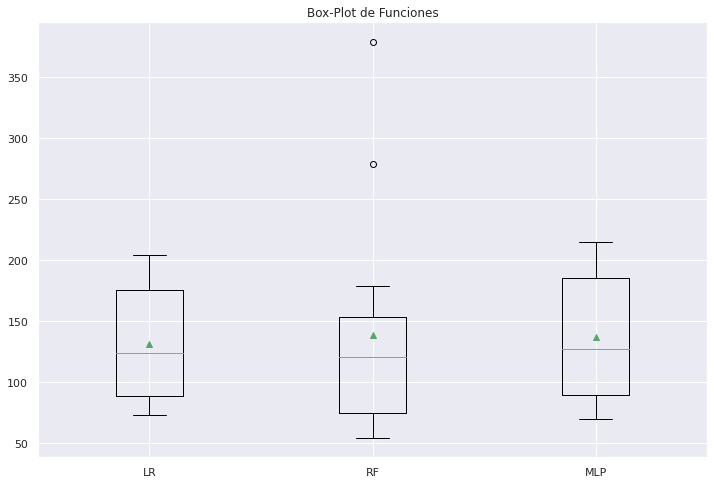

In [43]:
diagrama_caja(resultados) # llamamos a la función diagrama_caja para graficar los resultados de cada modelo en el conjunto de prueba 

###Conclusiones ejercicio #7

Observando los resultados de los Box Plot obtenidos para la métrica de MAPE se puede leer que se tiene un resultado en el porcentaje bastante elevado. Este se encuentra alrededor de 100. 
Respecto al artículo mencionado comentan que en la variable de salida “Lifetime people who have liked your page and engaged with your post” obtuvieron un resultado del 26.9, un resultado bastante mejor al que encontramos en nuestro modelo, esto lo podemos saber debido a que los resultados del error porcentual de absoluto medio se pueden interpretar cómo: entre el valor sea más pequeño se indica un mejor ajuste en el modelo, por lo que, aunque nosotros consideremos el resultado de regresión lineal de nuestro modelo que podría ser el mejor resultado entre los tres posibles calculados, inclusive así no se acerca al 26.9 que menciona el artículo podría demostrar un mejor desempeño con respecto al resto de los modelos.




#**Ejercicio-8.**
Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados.

In [44]:
def mi_gridsearchcv(modelo,parametros,X,y):  # definiendo la valización cruzada para los modelos que comenzaremos a ejecutar
  fullPipeline = Pipeline(steps=[('ct',ColumnPreprocessor),  ('model',modelo)]) # definiendo el pipeline que estaremos utiliando
  KFold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=random_state_v) # parametros con los que estara corriendo nuestro KFold Base 2 set 5 n_repeats base
  search = GridSearchCV(estimator = fullPipeline,
                      param_grid=parametros,
                      n_jobs=-1,
                      cv=KFold)

  search.fit(X, y)

  print(search.best_params_)
  print(search.best_score_)
  return search.best_params_

In [65]:
# Rung con mas parametros y menores iteraciones
param_mlp = {
    'model__hidden_layer_sizes': [(10,10), (3,3), (5,5), (7,7)], # aqui podemos ver las capas ocultas con las que se estan realizando los analisis, recordemos que  [Base :[(10,10), (11,11), (12,12), (13,13)] ]
    'model__alpha': [0.0001],                                          # entre mas capas, menos eficiencia tendría ya que se aproxima cada vez mas a "0"
    'model__learning_rate_init': [0.001,0.002,0.003,0.004]  # partimos como base: [0.001,0.0002] y sklearn define que el aprendizaje va del 0 a1 1
}
mi_gridsearchcv(MLPRegressor(max_iter=20000,random_state = random_state_v),param_mlp,X_train_V,y_train_V) # cambiamos el numero de iteraciones de 2000,3000,5000,9000 y probando (comienzo 1:03~1:10 NG, 1:11~1:24 layers originalesNG, OK)


{'model__alpha': 0.0001, 'model__hidden_layer_sizes': (10, 10), 'model__learning_rate_init': 0.002}
0.19058972101535854


{'model__alpha': 0.0001,
 'model__hidden_layer_sizes': (10, 10),
 'model__learning_rate_init': 0.002}

#**Ejercicio-9.**
Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

In [74]:
nombre_columns = cuantitativa + categoricas +  ordinal + binaria # definiendo los nombres de las columnas que utilizaremos a cotinuación

Feature: Page total likes, Score: 0.02148
Feature: Post Month, Score: 0.09551
Feature: Post Weekday, Score: 0.00886
Feature: Post Hour, Score: 0.01493
Feature: Category, Score: 0.05744
Feature: Type, Score: 0.68996
Feature: Paid, Score: 0.00971


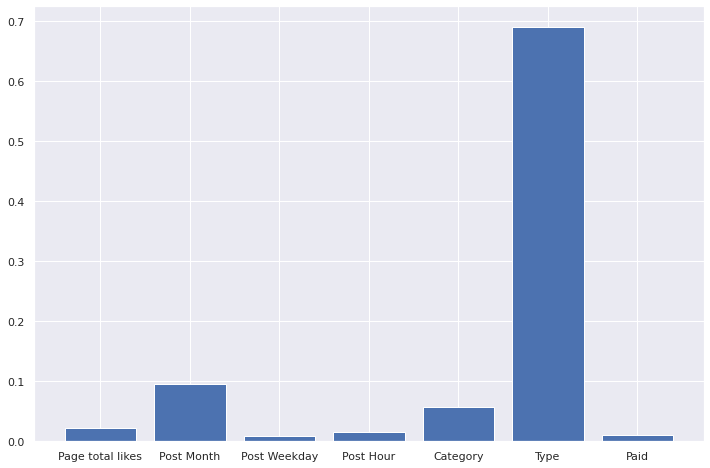

In [75]:
modelo_MLP = MLPRegressor(hidden_layer_sizes=(10,10), 
                            max_iter=20000, 
                            alpha=0.0001,
                            learning_rate_init=0.002,
                            random_state=random_state_v)  

X_train_Cleanned = pd.DataFrame(ColumnPreprocessor.fit_transform(X_train_V),columns=nombre_columns)

modelo_MLP.fit(X_train_Cleanned,y_train_V)
importance = permutation_importance(modelo_MLP, X_train_Cleanned, y_train_V, n_repeats=10,random_state=random_state_v)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %s, Score: %.5f' % (nombre_columns[i],v))
 
plt.bar([x for x in nombre_columns], importance['importances_mean'])
plt.show()

###Conclusiones del ejercicio #9

Podemos observar como es que al estar realizando un procesamiento de mayores capas, nos permite confirmar que entre mas capas tengamos el proceso toma no solo mas tiempo sino que tambien la conclusión se hace mucho mas complicada de poder llegar a esta.

Logramos identificar que estar *"variando"* con las iteraciónes, las capas, nos han ayudado para no solo realizar el proceso con mucha mejor velocidad, sino que tambien podemos ir identificando valores que van siendo distintos, podemos ir generando mas capas para que entonces vayamos permitiendole un mejor comportamiento dentro del analisis.

Se pueden observar algunos desempeños con mejor rendimiento, mejores resultados algunos mas bajos en ocasiones, pero ciertamente la mejoría no se percibe tan sustancial

Como podemos observar en la libreria de SKLearn, hay muchas condiciónes con las que podríamos estar observando diferentes comportamientos, en este caso utilizamos solo 3 parametros, pero bien pueden ser mucho mas, considerando que aun nos queda camino por recorrer y modelos por practicar, si puedo reiterar que la función de Grid Search para identificar los parametros nos son de gran ayuda para poder partir con los ajustes que podríamos determinar casi como **"iniciales"**.

*Esto gracias a que entre mas procesamiento sea capas de poder ir separando de manera mucho mas eficiente nuestros modelos, lo que nos entregara mejores y mas eficientes resultados*



#**Ejercicio-10.**
Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras.

In [76]:
param_RF = {
    'model__ccp_alpha': [0.0001, 0.002]
}
mi_gridsearchcv(RandomForestClassifier(random_state = random_state_v), param_RF, X_train_V, y_train_V)

{'model__ccp_alpha': 0.0001}
0.0025000000000000005


{'model__ccp_alpha': 0.0001}

In [77]:
nombre_columns = cuantitativa + categoricas +  ordinal + binaria

Feature: Page total likes, Score: 0.20300
Feature: Post Month, Score: 0.09225
Feature: Post Weekday, Score: 0.43225
Feature: Post Hour, Score: 0.34950
Feature: Category, Score: 0.25675
Feature: Type, Score: 0.08550
Feature: Paid, Score: 0.16850


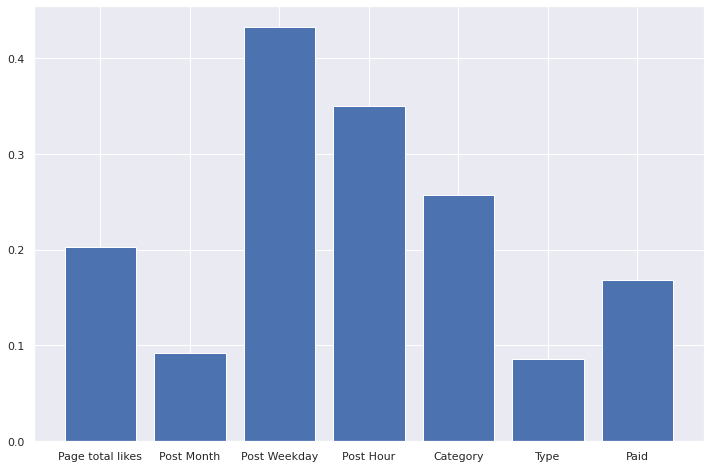

In [78]:
modelo_RF = RandomForestClassifier( 
                            ccp_alpha=0.0001,
                            random_state=random_state_v)  

X_train_Cleanned = pd.DataFrame(ColumnPreprocessor.fit_transform(X_train_V),columns=nombre_columns)

modelo_RF.fit(X_train_Cleanned,y_train_V)
importance_RF = permutation_importance(modelo_RF, X_train_Cleanned, y_train_V, n_repeats=10,random_state=random_state_v)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance_RF['importances_mean']):
	print('Feature: %s, Score: %.5f' % (nombre_columns[i],v))
 
plt.bar([x for x in nombre_columns], importance_RF['importances_mean'])
plt.show()

###Conclusiones del ejercicio #10

En este ejercicio en primera instancia se realizó el uso de la función que previamente habíamos definido como mi_gridsearchcv, para hacer la búsqueda de los mejores hiperparámetros.

Utilizando los mejores hiperparámetros utilizamos la función de permutation_importance para ver cuales son las variables que tienen un mayor peso. El resultado fue tal que *Post Weekday*, *Post Hour* y *category* fueron las características más importantes para este modelo. 

Los resultados son bastante distintos a los vistos en el ejercicio anterior, ya que en este, casi todas las características tiene un peso considerable en el resultado del modelo. Esta diferencia de resultados se puede deber a la manera en que funciona el modelo de bosque aleatorio, este utiliza los promedios para ir mejorando la predicción, conforme va generando sus resultados, haciendo esto un paso crítico para que el resultado sea tan diferente a nuestros resultados anteriores

Cabe resaltar que podemos visualizar que dependiendo del tipo de problema,análisis y datos que tengamos podrían ser la gama de opciones para realizar su respectivo analisis, si bien podríamos encontrar un procesamiento "genérico" puedo pensar que para ciertos tipos de proyectos puedan ser específicos los modelos que podríamos utilizar para encontrar una resolución *optima*


#**Ejercicio-11.**
Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras.

In [79]:

#GridSearch en LinearRegresion no tiene parametros relevantes para buscar
#mi_gridsearchcv(LinearRegression(), param_LR, X_train_V,y_train_V)

In [80]:
nombre_columns = cuantitativa + categoricas +  ordinal + binaria

Feature: Page total likes, Score: 0.00515
Feature: Post Month, Score: 0.02186
Feature: Post Weekday, Score: 0.00028
Feature: Post Hour, Score: 0.00228
Feature: Category, Score: 0.00008
Feature: Type, Score: 0.47577
Feature: Paid, Score: 0.00321


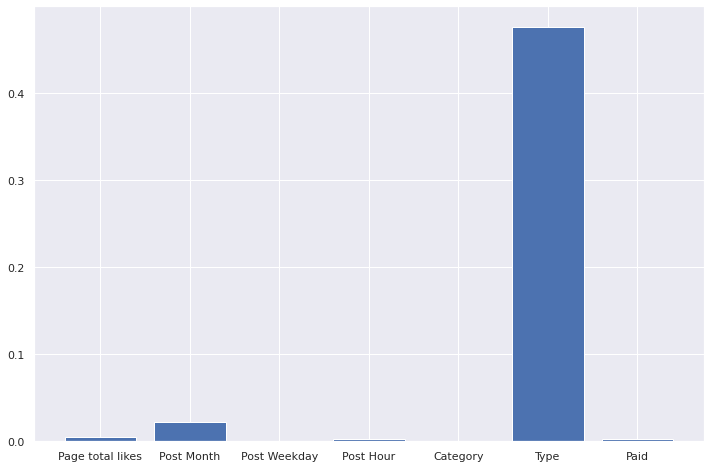

In [81]:
modelo_LR = LinearRegression()  

X_train_Cleanned = pd.DataFrame(ColumnPreprocessor.fit_transform(X_train_V),columns=nombre_columns)

modelo_LR.fit(X_train_Cleanned,y_train_V)
importance_LR = permutation_importance(modelo_LR, X_train_Cleanned, y_train_V, n_repeats=10,random_state=random_state_v)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance_LR['importances_mean']):
	print('Feature: %s, Score: %.5f' % (nombre_columns[i],v))
 
plt.bar([x for x in nombre_columns], importance_LR['importances_mean'])
plt.show()

###Conclusiones del ejercicio #11
En este último ejercicio se realiza nuevamente la función permutation_importance pero ahora con la finalidad de buscar las mejores características utilizando un modelo de regresión lineal.

El resultado de los pesos de las características en este caso es muy similar al del modelo MLP. Tenemos que la característica Type tiene un peso del 0.476 y Post Month 0.022, las demás tienen pesos demasiados bajos como para ser significantes.

Con el resultado de este modelo podríamos concluir que como tal la única característica que tiene importancia para el LPE es el tipo de contenido subido (Link, fotos, videos, status).


#**Ejercicio-12.**
Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE. Incluye tus conclusiones finales de la actividad.

Después de estar realizando ciertos ajustes, análisis, revisar las librerías, estar consultando diversas fuentes, desde scikit-learn y diversos foros, pudimos poner a prueba diferentes ajustes en los parámetros, realizar modelados óptimos o los más eficientes con grid search que ciertamente puedo decir que es una muy buena forma y eficiente (aunque obviamente consume tiempo) de encontrar los mejores parámetros para nuestra modelación con los parámetros que estamos buscando, logró identificar que esto optimiza nuestro tiempo a la larga y hará mucho más preciso nuestro análisis.

Este documento muestra resultados obtenidos de ciertos datos de información de Facebook, esto con la finalidad de ver cómo se comportan y poder estudiar una de sus variables la cual fue *“Lifetime People who have liked a Page and engaged with a post”*.

Comparando los resultados que tuvimos en este documento con los que se obtuvieron en el artículo de Moro-Rita-Vala, podemos ver diferencias por ejemplo en el resultado del MAPE, donde en el artículo se ve un porcentaje bastante bueno, alrededor del 27% el de nosotros rondaba el 100% en los distintos modelos evaluados. Por otra parte, si nos ponemos a comparar la importancia de las características obtenidas podemos ver que en el caso del artículo y también en algunos modelos que realizamos nosotros tenemos como característica más importante el tipo de contenido.


In [64]:
#### esta grafica nos podría servir para poder comparar modelos :) nada mas que tenga un poco mas de tiempecito la completo y veo si corre correctamente

#error_modelos = pd.DataFrame({
#                        'modelo': ['knn', 'lm', 'random forest', 'gradient boosting',
#                                   'stacking'],
#                        'rmse': [rmse_knn, rmse_lm, rmse_rf, rmse_gbm, rmse_stacking]
#                     })
#error_modelos = error_modelos.sort_values('rmse', ascending=False)

#fig, ax = plt.subplots(figsize=(6, 3.84))
#ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
#ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color='black')
#ax.tick_params(axis='y', which='major', labelsize=12)
#ax.set_title('Comparación de error de test modelos'),
#ax.set_xlabel('Test rmse');

###**Fin de la Actividad de la semana 7.**